##                                                  统计方法与机器学习实验二

###                                                                                                                                                              10215501435 杨茜雅

## 背景描述

汽车发动机在测功机上产生的**制动马力**被认为是**发动机转速**(每分钟转数，rpm)、**燃料的道路辛烷值**和**发动机压缩值**的函数，我们在实验室里进行实验，研究它们的函数关系。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| rpm | 发动机转速 | 连续变量 | $R^+$ |
| Road_Octane_Number | 道路辛烷值 | 连续变量 | $R+$ |
| Compression | 压缩值 | 连续变量 | $R^+$ |
| Brake_Horsepower | 制动马力 | 连续变量 | $R^+$ |

## 任务 
注：这里使用 $\alpha=0.05$ 的显著性水平。

1. 请用多元线性回归模型，描述制动马力和发动机转速、道路辛烷值以及压缩值之间的函数关系。
2. 分别将数据中心化、标准化之后，比较参数估计的异同，并进行评述（提示：可以结合理论课的课件）。
3. 从模型显著性、参数显著性以及残差分析三个角度，分析多元线性回归模型是否合理。
4. 若取发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，分别给出制动马力值的置信区间和预测区间。


In [74]:
import os # 修改工作目录

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from jupyterquiz import display_quiz

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

alpha = 0.05

In [75]:
os.chdir("/Users/86138/统计方法实验二/Data")

In [76]:
print('Data 3 is shown as follows: \n', pd.read_csv("Project_3.csv"))

Data 3 is shown as follows: 
      rpm  Road Octane Number  Compression  Brake Horsepower
0   2000                  90          100               225
1   1800                  94           95               212
2   2400                  88          110               229
3   1900                  91           96               222
4   1600                  86          100               219
5   2500                  96          110               278
6   3000                  94           98               246
7   3200                  90          100               237
8   2800                  88          105               233
9   3400                  86           97               224
10  1800                  90          100               223
11  2500                  89          104               230


In [77]:
Data = pd.read_csv("Project_3.csv")
print(Data.head())

    rpm  Road Octane Number  Compression  Brake Horsepower
0  2000                  90          100               225
1  1800                  94           95               212
2  2400                  88          110               229
3  1900                  91           96               222
4  1600                  86          100               219


In [78]:
n = Data.shape[0]
p = Data.shape[1] - 1
print("The number of instances is ", n)
print("The number of features is ", p)

The number of instances is  12
The number of features is  3


# Task 1: 请用多元线性回归模型，描述制动马力和发动机转速、道路辛烷值以及压缩值之间的函数关系。

多元线性回归模型形如
$$
y_i = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \beta_3 x_{3} + \epsilon_{i}, i=1,2,\cdots,n
$$
其中，$\beta_0,\beta_1,\beta_2,\beta_3$分别是未知参数，而$\epsilon_{i}$是误差项，且满足$E(\epsilon_{i}) = 0$和$Var(\epsilon_{i}) = \sigma^2$。$n$表示样本量。

我们可以用矩阵的形式来写这个模型，即
$$
\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}
$$
其中，
- 响应变量构成的向量为$$
\mathbf{y} = \begin{pmatrix}y_1\\y_2\\\vdots\\ y_n\end{pmatrix},
$$
- 自变量/特征构成的矩阵$$
\mathbf{X} = \begin{pmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} \\
\end{pmatrix},
$$
- 待估参数向量为
$$
\mathbf{\beta} = \begin{pmatrix}
\beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3
\end{pmatrix},
$$
- 误差向量为
$$
\mathbf{\epsilon} = \begin{pmatrix}\epsilon_1\\\epsilon_2\\\vdots\\ \epsilon_n\end{pmatrix}.
$$


已知参数向量的估计为
$$
\hat{\mathbf{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}'\mathbf{y}.
$$

**Solution:**  
使用多元线性回归的方法，令发动机转速为$X_1$，道路辛烷值为$X_2$，压缩值为$X_3$，制动马力为$Y$。则线性模型为：$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 +\epsilon$，并假定随机误差项符合正态分布。根据以上数据，可以求得$\hat{\beta_1},\hat{\beta_2},\hat{\beta_3}$及线性回归方程如下。

## 课上代码迁移 ##

In [79]:
## Method 1: Matrix Calculus
Data1 = sm.add_constant(Data)
Data1_value = Data1.values
X = Data1_value[:,0:(p+1)]
y = Data1_value[:,-1]
beta_hat_1 = np.linalg.inv(X.T @ X) @ (X.T @ y)
# A @ B <=> np.dot(A,B) matrix multiply
print("The estimates of the parameters are \n", 
      np.around(beta_hat_1,4))

The estimates of the parameters are 
 [-2.660312e+02  1.070000e-02  3.134800e+00  1.867400e+00]


In [80]:
## Method 2: 「statsmodels」 package
Data2 = pd.read_csv("Project_3.csv")

# 将列名中的空格改为下划线
Data2 = Data2.rename(columns={'Road Octane Number': 'Road_Octane_Number', 'Brake Horsepower': 'Brake_Horsepower'})

# 打印前几行数据，检查列名是否已更改
print(Data2.head())

model1 = ols("Brake_Horsepower ~ rpm + Road_Octane_Number + Compression", Data2).fit()
beta_hat_2 = model1.params
#print("The estimates of the parameters are \n", 
#      round(model.param(),4))
print("The estimates of the parameters are \n", 
      round(beta_hat_2,4))

    rpm  Road_Octane_Number  Compression  Brake_Horsepower
0  2000                  90          100               225
1  1800                  94           95               212
2  2400                  88          110               229
3  1900                  91           96               222
4  1600                  86          100               219
The estimates of the parameters are 
 Intercept            -266.0312
rpm                     0.0107
Road_Octane_Number      3.1348
Compression             1.8674
dtype: float64


In [81]:
## Method 3: 「scikit-learn」package
model2 = linear_model.LinearRegression()
X_without_intercept = X[:,1:4]
model2.fit(X_without_intercept, y)
beta_hat_3 = np.append(np.array(model2.intercept_),model2.coef_)
print("The estimates of the parameters are \n", 
      np.around(beta_hat_3,4))

The estimates of the parameters are 
 [-2.660312e+02  1.070000e-02  3.134800e+00  1.867400e+00]


## 自己尝试 ##

In [82]:
import scipy.stats as stats
import math

x = pd.read_csv('Project_3.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1
df = pd.DataFrame(data, columns = ['intercept', 'P1', 'P2', 'P3', 'F'])
print(df)

# Do the multiple linear regression
model = ols('F ~ P1 + P2 + P3', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
X = data[:, 0 : p + 1]
Y = data[:, -1]
Y_hat = model.fittedvalues
model.summary()

    intercept      P1    P2     P3      F
0         1.0  2000.0  90.0  100.0  225.0
1         1.0  1800.0  94.0   95.0  212.0
2         1.0  2400.0  88.0  110.0  229.0
3         1.0  1900.0  91.0   96.0  222.0
4         1.0  1600.0  86.0  100.0  219.0
5         1.0  2500.0  96.0  110.0  278.0
6         1.0  3000.0  94.0   98.0  246.0
7         1.0  3200.0  90.0  100.0  237.0
8         1.0  2800.0  88.0  105.0  233.0
9         1.0  3400.0  86.0   97.0  224.0
10        1.0  1800.0  90.0  100.0  223.0
11        1.0  2500.0  89.0  104.0  230.0
参数估计值: 
 Intercept   -266.0312
P1             0.0107
P2             3.1348
P3             1.8674
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      F   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00317
Time:                        15:22:12   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.0312     92.674     -2.871      0.021    -479.737     -52.325
P1             0.0107      0.004      2.390      0.044       0.000       0.021
P2             3.1348      0.844      3.712      0.006       1.188       5.082
P3             1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 综上所述，我们可以输出多元线性回归方程 ##

In [83]:
print('Y_hat = %.2f + (%.2f * X1) + (%.2f * X2) + (%.2f * X3)' % (beta[0], beta[1], beta[2], beta[3]))

Y_hat = -266.03 + (0.01 * X1) + (3.13 * X2) + (1.87 * X3)


# Task 2: 分别将数据中心化、标准化之后，比较参数估计的异同，并进行评述（提示：可以结合理论课的课件）。

## 中心化

### 课上代码

In [84]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Brake_Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00317
Time:                        15:22:14   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -266.0312     92.674     -2.871      0.021    -479.737     -52.325
rpm                    0.0107      0.004      2.390      0.044       0.000       0.021
Road_Octane_Number     3.1348      0.844      3.712      0.006       1.188       5.082
Compression            1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
## 中心化
Data1 = sm.add_constant(Data)
Data1_value = Data1.values
X = Data1_value[:,0:(p+1)]
y = Data1_value[:,-1]
X_center = preprocessing.scale(X_without_intercept, with_mean = True, with_std=False)
y_center = preprocessing.scale(y, with_mean = True, with_std=False)
# with_mean = True (default), with_std = True (default)

# print(X_center) 

print("The sample means of centered features are ", np.around(np.mean(X_center,axis=0),4))
print("The sample mean of centered response is ", np.around(np.mean(y_center,axis=0),4))

The sample means of centered features are  [-0. -0.  0.]
The sample mean of centered response is  0.0


In [86]:
model3 = linear_model.LinearRegression()
model3.fit(X_center, y_center)
beta_hat_4 = np.append(np.array(model3.intercept_),model3.coef_)
print("The estimates of the parameters are \n", 
          np.around(beta_hat_4,4))

The estimates of the parameters are 
 [0.     0.0107 3.1348 1.8674]


### 自己尝试

In [87]:
X = data[:, 0 : p + 1]
Y = data[:, -1]
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 数据中心化
X_cent = X - X_mean
Y_cent = Y - Y_mean

# Do the multiple linear regression
df = pd.DataFrame(X_cent, columns = ['intercept_cent', 'P1_cent', 'P2_cent', 'P3_cent'])
df['F_cent'] = Y_cent
model_cent = ols('F_cent ~ P1_cent + P2_cent + P3_cent', df).fit()
beta_cent = model_cent.params
print('参数估计值: \n', round(beta_cent, 4))
Y_hat_cent = model_cent.fittedvalues
model_cent.summary()

参数估计值: 
 Intercept    0.0000
P1_cent      0.0107
P2_cent      3.1348
P3_cent      1.8674
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 F_cent   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00317
Time:                        15:22:16   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.11e-16      2.544   4.36e-17      1.000      -5.866       5.866
P1_cent        0.0107      0.004      2.390      0.044       0.000       0.021
P2_cent        3.1348      0.844      3.712      0.006       1.188       5.082
P3_cent        1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 输出中心化后的多元线性回归方程

In [88]:
print('Y_hat_cent = %.2f + (%.2f * X1_cent) + (%.2f * X2_cent) + (%.2f * X3_cent)' % (beta_cent[0], beta_cent[1], beta_cent[2], beta_cent[3]))

Y_hat_cent = 0.00 + (0.01 * X1_cent) + (3.13 * X2_cent) + (1.87 * X3_cent)


### 通过对比数据中心化前后的结果，我们可以发现，对数据进行中心化之后回归常数变为 0，而回归系数值未改变。
**回归常数变为0的原因**是中心化的过程中，自变量 X 被减去了它们的均值，这样在回归模型中，截距项对应的是因变量Y在所有自变量均为均值时的预测值，因此截距项会变为0。

**回归系数值未改变的原因**是中心化不会改变自变量之间的相对关系，因此回归系数的值保持不变。

中心化主要的作用是消除了截距项与自变量之间的关系，使模型更容易解释，但不会影响自变量对因变量的影响程度。模型中的回归系数仍然表示每个自变量对因变量的影响大小，只是解释上更容易理解。

## 标准化

In [89]:
X = data[:, 0 : p + 1]
Y = data[:, -1]
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 标准化
X_std = (X - X_mean) / np.std(X, axis=0)
Y_std = (Y - Y_mean) / np.std(Y)

# Do the multiple linear regression
df = pd.DataFrame(X_std, columns=['intercept_std', 'P1_std', 'P2_std', 'P3_std'])
df['F_std'] = Y_std
model_std = ols('F_std ~ P1_std + P2_std + P3_std', df).fit()
beta_std = model_std.params
print('参数估计值: \n', round(beta_std, 4))
Y_hat_std = model_std.fittedvalues
model_std.summary()


参数估计值: 
 Intercept    0.0000
P1_std       0.3757
P2_std       0.5793
P3_std       0.5477
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  F_std   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00317
Time:                        15:22:18   Log-Likelihood:                -7.1718
No. Observations:                  12   AIC:                             22.34
Df Residuals:                       8   BIC:                             24.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e-17      0.156   1.12e-16      1.000      -0.359       0.359
P1_std         0.3757      0.157      2.390      0.044       0.013       0.738
P2_std         0.5793      0.156      3.712      0.006       0.219       0.939
P3_std         0.5477      0.157      3.494      0.008       0.186       0.909
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 输出标准化后的多元线性回归方程

In [90]:
print('Y_hat_std = %.2f + (%.2f * X1_std) + (%.2f * X2_std) + (%.2f * X3_std)' % (beta_std[0], beta_std[1], beta_std[2], beta_std[3]))

Y_hat_std = 0.00 + (0.38 * X1_std) + (0.58 * X2_std) + (0.55 * X3_std)


### 通过对比数据标准化前后的结果，我们可以发现，参数的正负号不变、大小和原来的参数之间存在关系
**参数的正负号不变的原因**是标准化数据不会改变自变量之间的相对关系，因此回归系数的方向（正负号）仍然保持不变。

**大小和原来的参数之间存在关系的原因**标准化后的回归系数可以直接比较各自变量对因变量的影响程度。如果自变量的取值范围差异较大，标准化后的回归系数可以用来衡量它们的相对影响。标准化后的回归系数表示因变量 Y 在单位标准差变化下对每个自变量的变化量。

# Task 3: 从模型显著性、参数显著性以及残差分析三个角度，分析多元线性回归模型是否合理。

### 1、模型显著性和参数显著性

#### 课上代码

In [91]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Brake_Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00317
Time:                        15:22:21   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -266.0312     92.674     -2.871      0.021    -479.737     -52.325
rpm                    0.0107      0.004      2.390      0.044       0.000       0.021
Road_Octane_Number     3.1348      0.844      3.712      0.006       1.188       5.082
Compression            1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

从上表可知，
- $F$检验统计量可以计算为11.12，其$p$值为$0.00317$。因此，我们认为回归模型是有意义的。
- 对于不同的特征，$t$检验统计量分别为$2.390和$3.712$和$3.494 	$，其$p$值均不大于$0.05 。因此，我们认为这三个特征都是有意义的。

### 自己实践

In [92]:
# 求解相关项
SSE = sum((Y - Y_hat) ** 2)
SST = sum((Y - Y_mean) ** 2)
SSR = sum((Y_hat - Y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # 方差
sigma = np.sqrt(sigma2)  # 标准差

c = np.dot(X.T, X)
C = np.linalg.inv(c)  # 求逆
# print(C)

**多元线性模型的显著性检验——F 检验:**  
检验假设：$H_0: \beta_1=\beta_2=\beta_3=0$ vs $H_1: \exists \beta_i \neq 0,i=1,2,3$

In [93]:
# 计算F0
F0 = (SSR / p) / (SSE / (n - p - 1))
# F0 = model.fvalue
print('F0: %.2f' % F0)
F = round(f.ppf(0.95, dfn = p, dfd = n - p - 1), 2)

# 法1：
pVal1 = f.sf(F0, p, n - p - 1)
# pVal1 = model.f_pvalue
print('pVal1: %.5f' % pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 

# 法2：
if F0 > F:
    print('Since F0 > F(0.95, 3, 8) = %.2f, reject H0.' % F)
else:
    print('Accept H0.') 

F0: 11.12
pVal1: 0.00317

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 3, 8) = 4.07, reject H0.


由 F 检验结果可知，该回归方程是显著的。

**多元线性模型的显著性检验——t 检验:**  
检验假设：$H_{0j}: \beta_j=0$ vs $H_{1j}: \beta_j \neq 0,j=1,2,3$

In [94]:
# t检验
t0 = []
for i in range(p + 1):   
    t0.append(beta[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
# t0 = model.tvalues
print('t0值为：', np.round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - p - 1)
print('t的临界值为：%.4f' % tVal)
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
# pVal2 = model.pvalues / 2
print('P值为：', np.round(pVal2, 4))

print('\n')
# 法1：
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('Since p%d-value < 0.05, reject H0%d.' % (i + 1, i + 1))
    else:
        print('Accept H0%d.' % (i + 1))
print('\n')   

# 法2：
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('Since t0%d > t(0.975, 8) = %.4f, reject H0%d' % (i + 1, tVal, i + 1))
    else:
        print('Accept H0%d.' % (i + 1)) 

t0值为： [-2.8706  2.3896  3.7123  3.4936]
t的临界值为：2.3060
P值为： [0.0104 0.0219 0.003  0.0041]


Since p1-value < 0.05, reject H01.
Since p2-value < 0.05, reject H02.
Since p3-value < 0.05, reject H03.


Since t01 > t(0.975, 8) = 2.3060, reject H01
Since t02 > t(0.975, 8) = 2.3060, reject H02
Since t03 > t(0.975, 8) = 2.3060, reject H03


由 t 检验结果可知，各回归系数都是显著的。

**复相关系数（可决系数）的检验:**

定义样本决定系数为
$$
R^{2}=\frac{S S_{R}}{S S_{T}}=1-\frac{S S_{E}}{S S_{T}}
$$

$R^{2}$ 的取值在 [0,1] 区间内。

1. $R^{2}$ 越接近 $1,$ 表明回归拟合的效果越好。
2. $R^{2}$ 越接近 $0,$ 表明回归拟合的效果越差。

调整可决系数：

$$R_{a}^{2}=1-\frac{n-1}{n-m-1}\left(1-R^{2}\right)$$

随着变量个数上升，$R^{2}$会增大而影响决定系数的准确度，所以引入惩罚项加以修正，称之 $adjusted R^{2}$

In [95]:
# 可决系数
R2 = SSR / SST
print('可决系数：%.4f' % R2)

# 调整可决系数
R2c = 1 - (SSE/(n-p-1)) / (SST/(n-1))
print('调整可决系数Ra：%.4f' % R2c)

可决系数：0.8065
调整可决系数Ra：0.7340


由于复相关系数（可决系数）值接近1，可以说明整体上 $X_1$,$X_2$,$X_3$与 $Y$ 呈线性关系。

### 2、残差分析

###  计算Brake_Horsepower的残差

In [96]:
# 计算制动马力的残差
data_res = data * 1.0  # 乘1.0 不然会损失精度
for i in range(n):
    data_res[:, p + 1] = Y - Y_hat
df = pd.DataFrame(data_res, columns = ['intercept', 'P1', 'P2', 'P3', 'F_res'])
res = data_res[:, p + 1]
# res = model.resid
print(df.head())

   intercept      P1    P2     P3      F_res
0        1.0  2000.0  90.0  100.0   0.731289
1        1.0  1800.0  94.0   95.0 -13.328247
2        1.0  2400.0  88.0  110.0 -11.958476
3        1.0  1900.0  91.0   96.0   3.137442
4        1.0  1600.0  86.0  100.0  11.555798


### 残差的正态概率图   
使用残差正态概率图可验证残差呈正态分布的假设。残差的正态概率图应该大致为一条直线。

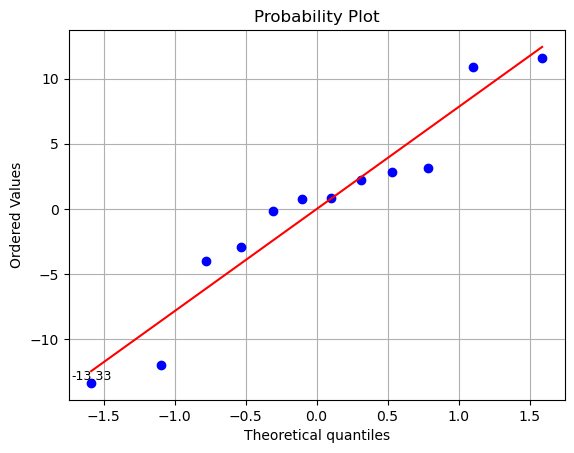

In [97]:
# 残差的正态概率图
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [98]:
# 异常值检验
MSE = SSE / (n - p - 1)
# MSE = model.mse_resid
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '是异常值')


残差 -13.33 不是异常值.


从残差的正态概率图可以看出，这些点大致在一条直线附近，说明数据近似服从正态分布。

### 残差与拟合值的关系图   
使用残差与拟合值图可验证“残差随机分布”和“具有常量方差”的假设。理想情况下，点应当在 0 的两端随机分布（模型的拟合点应该平均散布在被拟合值点附近），点中无可辨识的模式。  
下表中的模式可能表示该模型不满足模型假设: 

| 模式 | 模式的含义 |
| :----------: | :--------: |
| 残差相对拟合值呈扇形或不均匀分散 | 异方差 |
| 曲线 | 缺少高阶项 |
| 远离 0 的点 | 异常值 |
| 在 X 方向远离其他点的点 | 有影响的点|

Text(0, 0.5, 'e_i')

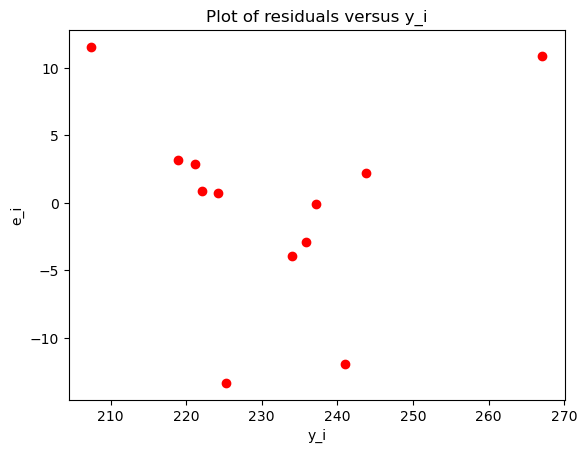

In [99]:
# 残差与拟合值的关系图
plt.scatter(Y_hat, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

从残差与拟合值的关系图中，无法拒绝方差齐性的假设。所以不能认为模型不合理，即认为模型合理。

#### 方差分析可以看成特殊情况下的回归分析，方差分析就是解释变量全为分组的dummy（哑变量）的回归分析。  

方差齐性检验的本质：样本以及总体的方差分布是常数，和自变量或因变量没关系。    
线性回归里面我们一般用残差图来检验方差齐性，画散点图是为了弄清因变量和残差之间有没有关系。这里并不是说不同指标的方差不同，因为这里的自变量不像ANOVA中是可以人为控制的（分组-取值），这里的自变量是**观察**到的，如果我们没法取到每个 x 值所有对应的 y 值，就不能说对不同的指标方差不同，只是说观测值的方差不同（也只是一种探测）；我们这里只是用残差图去估计因变量的方差齐性（比较主观，看残差分布是否与拟合值没有明显的趋势关系）。  
当然我们并不能通过残差的分布来证明因变量的方差齐性，我们只是提出了“方差齐性”的假设，然后画出残差图，它杂乱无章，不相关，看起来是独立的，所以我们不能推翻这个假设，就认为观测值的方差是齐性的。  


# Task 4: 若取发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，分别给出制动马力值的置信区间和预测区间。

#### 注意两者的计算方法

**Remark3**: 多元情况下依然有预测区间的长度大于置信区间，借机温习一下二者的计算方法

预测区间：

$$
(\hat{y}_{f}-t_{\alpha/2}*\sqrt{(1+\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}},\hat{y}_{f}+t_{\alpha/2}*\sqrt{(1+\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}}$$

置信区间：

$$
(\hat{y}_{f}-t_{\alpha/2}*\sqrt{(\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}},\hat{y}_{f}+t_{\alpha/2}*\sqrt{(\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}}$$

### 置信区间

In [100]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    print(delta0)
    return Y0_int

x0 = [1]
for i in range(p):
    x0.append(int(input()))
print('给定 x = ', x0, ', E(y_0) 的置信区间：', np.round(confidence_interval(x0), 4))
print('宽度 = ',np.round(confidence_interval(x0), 4)[1]-np.round(confidence_interval(x0), 4)[0])

3000
90
100
8.736173458784997
给定 x =  [1, 3000, 90, 100] , E(y_0) 的置信区间： [226.2457 243.7181]
8.736173458784997
8.736173458784997
宽度 =  17.472399999999993


### 预测区间

In [101]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x0_ = [1]
for i in range(p):
    x0_.append(int(input()))
print('给定 x = ', x0_, ', y_0 的预测区间：', np.round(confidence_interval(x0_), 4))
print('宽度 = ',np.round(confidence_interval(x0), 4)[1]-np.round(confidence_interval(x0), 4)[0])

3000
90
100
给定 x =  [1, 3000, 90, 100] , y_0 的预测区间： [212.8622 257.1016]
宽度 =  44.23940000000002


从上面的差值可以看出，宽度44.23>17.47，符合预测区间大于置信区间的逻辑

### 遇到的问题

#### 1、标准化

In [102]:
X = data[:, 0 : p + 1]
Y = data[:, -1]
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 标准化
X_std = (X - X_mean) / np.std(X)
Y_std = (Y - Y_mean) / np.std(Y)

# Do the multiple linear regression
df = pd.DataFrame(X_std, columns=['intercept_std', 'P1_std', 'P2_std', 'P3_std'])
df['F_std'] = Y_std
model_std = ols('F_std ~ P1_std + P2_std + P3_std', df).fit()
beta_std = model_std.params
print('参数估计值: \n', round(beta_std, 4))
Y_hat_std = model_std.fittedvalues
model_std.summary()

参数估计值: 
 Intercept      0.0000
P1_std         0.6913
P2_std       202.2802
P3_std       120.4986
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  F_std   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00317
Time:                        15:22:49   Log-Likelihood:                -7.1718
No. Observations:                  12   AIC:                             22.34
Df Residuals:                       8   BIC:                             24.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e-17      0.156   1.12e-16      1.000      -0.359       0.359
P1_std         0.6913      0.289      2.390      0.044       0.024       1.358
P2_std       202.2802     54.489      3.712      0.006      76.628     327.932
P3_std       120.4986     34.491      3.494      0.008      40.961     200.036
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

在标准化的过程中，X没有指定axis=0。如果不指定 axis=0，np.std(X) 将计算整个矩阵 X 的标准差，得到的是一个标量值，而我们通常期望的是对每一列（每个自变量）分别计算标准差，以便进行标准化。

通过指定 axis=0，我们告诉 NumPy 在每一列上计算标准差，而不是整个矩阵。这样，X_std 将包含每个自变量的标准化值，而不是整个矩阵的标准差。

因此，指定 axis=0 是确保正确计算每个自变量的标准差，并进行正确的标准化。

#### 2、矩阵乘法

由np.array()多维数组定义的矩阵，使用运算符“@”可以进行矩阵乘法。'*'运算符是将两个向量中每个元素进行相乘，是数乘运算，需要两个参与运算的矩阵维度相同。'np.dot()'和'@'运算符都可以起到矩阵乘法的作用，在处理连乘时‘@’相对方便。